In [1]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from numpy import random, float, array
import numpy as np
import seaborn as sns


df = pd.read_csv("cleaned_data.csv")

df.head()

,acts,address,datefrom,dateto,day,district,filename,link,pahar,psdate,pstation,pstime,section,timefrom,timeto,full_charge,group_charge,hour
0,1 IPC 1860,"JHUGGI NO. A-603, SANJAY CAMP, CHANAKYA PURI, ...",2017-01-01,2017-01-01,Sunday,NEW DELHI,8165007170003.pdf,http://59.180.234.21:8080/citizen/gefirprint.h...,4.0,2017-01-01,CHANKYA PURI,23:40,363,11:00,11:00,Kidnapping,Kidnapping,11.0
1,1 IPC 1860,"PANCHSHEEL MARG, ASHOKA HOTEL PARKING, CHANAKY...",2017-01-05,2017-01-05,Thursday,NEW DELHI,8165007170005.pdf,http://59.180.234.21:8080/citizen/gefirprint.h...,4.0,2017-01-05,CHANKYA PURI,13:00,186/353,11:00,11:00,Disobedience to pub. Serv. Order-hurting publi...,Disobedience to pub. Serv. Order-hurting publi...,11.0
2,1 IPC 1860,"H.NO. 773, 7TH FLOOR, BLOCK-7, BAPU DHAM, CHAN...",2014-04-21,2016-04-11,INTERVENING DAY,NEW DELHI,8165007170006.pdf,http://59.180.234.21:8080/citizen/gefirprint.h...,NaN,2017-01-07,CHANKYA PURI,13:30,498A/406/34,00:00,00:00,Criminal breach of trust-domestic abuse,domestic abuse,0.0
3,1 IPC 1860,"RIDGE ROAD TOWARDS KAROL BAGH, NEAR SIMON BOLI...",2017-01-01,2017-01-01,Sunday,NEW DELHI,8165007170007.pdf,http://59.180.234.21:8080/citizen/gefirprint.h...,6.0,2017-01-08,CHANKYA PURI,09:20,279/337,17:20,17:20,Rash driving-endangering safety of others,Rash driving,17.0
4,1 IPC 1860,MTC ROAD NEAR 11 MURTI,2017-01-13,2017-01-13,Friday,NEW DELHI,8165007170008.pdf,http://59.180.234.21:8080/citizen/gefirprint.h...,7.0,2017-01-13,CHANKYA PURI,22:20,279/337,20:25,20:25,Rash driving-endangering safety of others,Rash driving,20.0


In [2]:
dis = []
for i in df['district']:
    if i not in dis:
        dis.append(i)
dis

['NEW DELHI',
 'WEST',
 'OUTER DISTRICT',
 'SOUTH WEST',
 'SOUTH-EAST',
 'NORTH EAST',
 'NORTH WEST',
 'SOUTH DELHI',
 'ROHINI',
 'CRIME BRANCH',
 'EOW',
 'NORTH',
 'CENTRAL',
 'EAST',
 'METRO',
 'PALAM AIRPORT',
 'RAILWAYS',
 'SHAHDARA',
 'SPECIAL POLICE UNIT FOR WOMEN & CHILDREN']

In [3]:
fin_data = []
for i in dis:
    temp = {}
    for j in range(0,len(df['district'])):
        if i == df['district'][j]:
            if df['day'][j] not in temp.keys():
                temp[df['day'][j]] = 1
            else:
                temp[df['day'][j]] += 1
            
    fin_data.append(temp)

fin_data


[{'Friday': 25,
  'INTERVENING DAY': 19,
  'Monday': 18,
  'Saturday': 18,
  'Sunday': 22,
  'Thursday': 28,
  'Tuesday': 18,
  'Wednesday': 18},
 {'Friday': 31,
  'INTERVENING DAY': 7,
  'Monday': 34,
  'Saturday': 51,
  'Sunday': 32,
  'Thursday': 26,
  'Tuesday': 33,
  'Wednesday': 23},
 {'Friday': 26,
  'INTERVENING DAY': 31,
  'Monday': 29,
  'Saturday': 41,
  'Sunday': 34,
  'Thursday': 22,
  'Tuesday': 18,
  'Wednesday': 22},
 {'Friday': 28,
  'INTERVENING DAY': 8,
  'Monday': 29,
  'Saturday': 28,
  'Sunday': 23,
  'Thursday': 22,
  'Tuesday': 21,
  'Wednesday': 26},
 {'Friday': 41,
  'INTERVENING DAY': 21,
  'Monday': 35,
  'Saturday': 52,
  'Sunday': 35,
  'Thursday': 31,
  'Tuesday': 35,
  'Wednesday': 30},
 {'Friday': 41,
  'INTERVENING DAY': 3,
  'Monday': 39,
  'Saturday': 54,
  'Sunday': 34,
  'Thursday': 35,
  'Tuesday': 38,
  'Wednesday': 27},
 {'Friday': 29,
  'INTERVENING DAY': 11,
  'Monday': 44,
  'Saturday': 28,
  'Sunday': 30,
  'Thursday': 36,
  'Tuesday': 51,
 

In [4]:
# Initialize the matplotlib figure

# to_plot = df[["dis_var","count"]]

# to_plot.to_csv('Plot.csv')
# to_plot = to_plot[to_plot.columns].astype(float)

In [5]:
data = pd.DataFrame(fin_data)
data.to_csv('hello_refine_data.csv', index=False)
data['Districts'] = dis
data.fillna(0, inplace=True)
data['Districts'] = data['Districts'].str.title()
data.head()
    

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts
0,25.0,19.0,18.0,18.0,22.0,28.0,18.0,18.0,New Delhi
1,31.0,7.0,34.0,51.0,32.0,26.0,33.0,23.0,West
2,26.0,31.0,29.0,41.0,34.0,22.0,18.0,22.0,Outer District
3,28.0,8.0,29.0,28.0,23.0,22.0,21.0,26.0,South West
4,41.0,21.0,35.0,52.0,35.0,31.0,35.0,30.0,South-East


In [6]:
days = data.iloc[:,:-1]
Total = days.sum(axis=1)
Total

0     166.0
1     237.0
2     223.0
3     185.0
4     280.0
5     271.0
6     271.0
7     245.0
8     209.0
9      16.0
10     19.0
11    268.0
12    340.0
13    226.0
14    256.0
15     32.0
16    162.0
17    228.0
18     22.0
dtype: float64

In [7]:
data['Total'] = Total
data['Count'] = Total
data.head()

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts,Total,Count
0,25.0,19.0,18.0,18.0,22.0,28.0,18.0,18.0,New Delhi,166.0,166.0
1,31.0,7.0,34.0,51.0,32.0,26.0,33.0,23.0,West,237.0,237.0
2,26.0,31.0,29.0,41.0,34.0,22.0,18.0,22.0,Outer District,223.0,223.0
3,28.0,8.0,29.0,28.0,23.0,22.0,21.0,26.0,South West,185.0,185.0
4,41.0,21.0,35.0,52.0,35.0,31.0,35.0,30.0,South-East,280.0,280.0


In [8]:
sns.color_palette("pastel")

[(0.5725490196078431, 0.7764705882352941, 1.0),
 (0.592156862745098, 0.9411764705882353, 0.6666666666666666),
 (1.0, 0.6235294117647059, 0.6039215686274509),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.6901960784313725, 0.8784313725490196, 0.9019607843137255)]

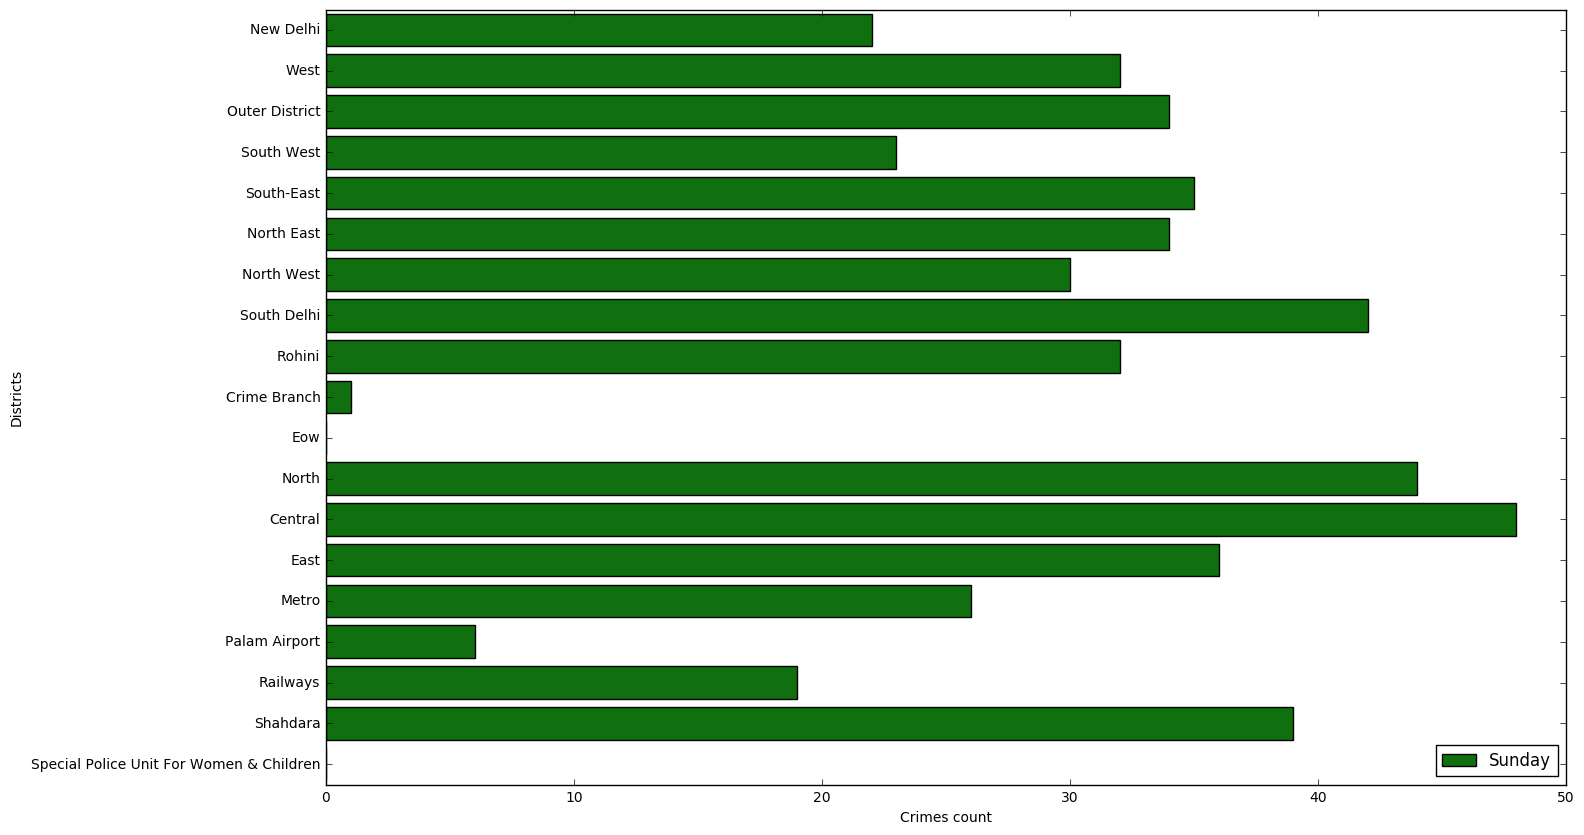

In [9]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Sunday", data=data,label="Sunday",color="g")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( xlabel="Crimes count", ylabel="Districts");

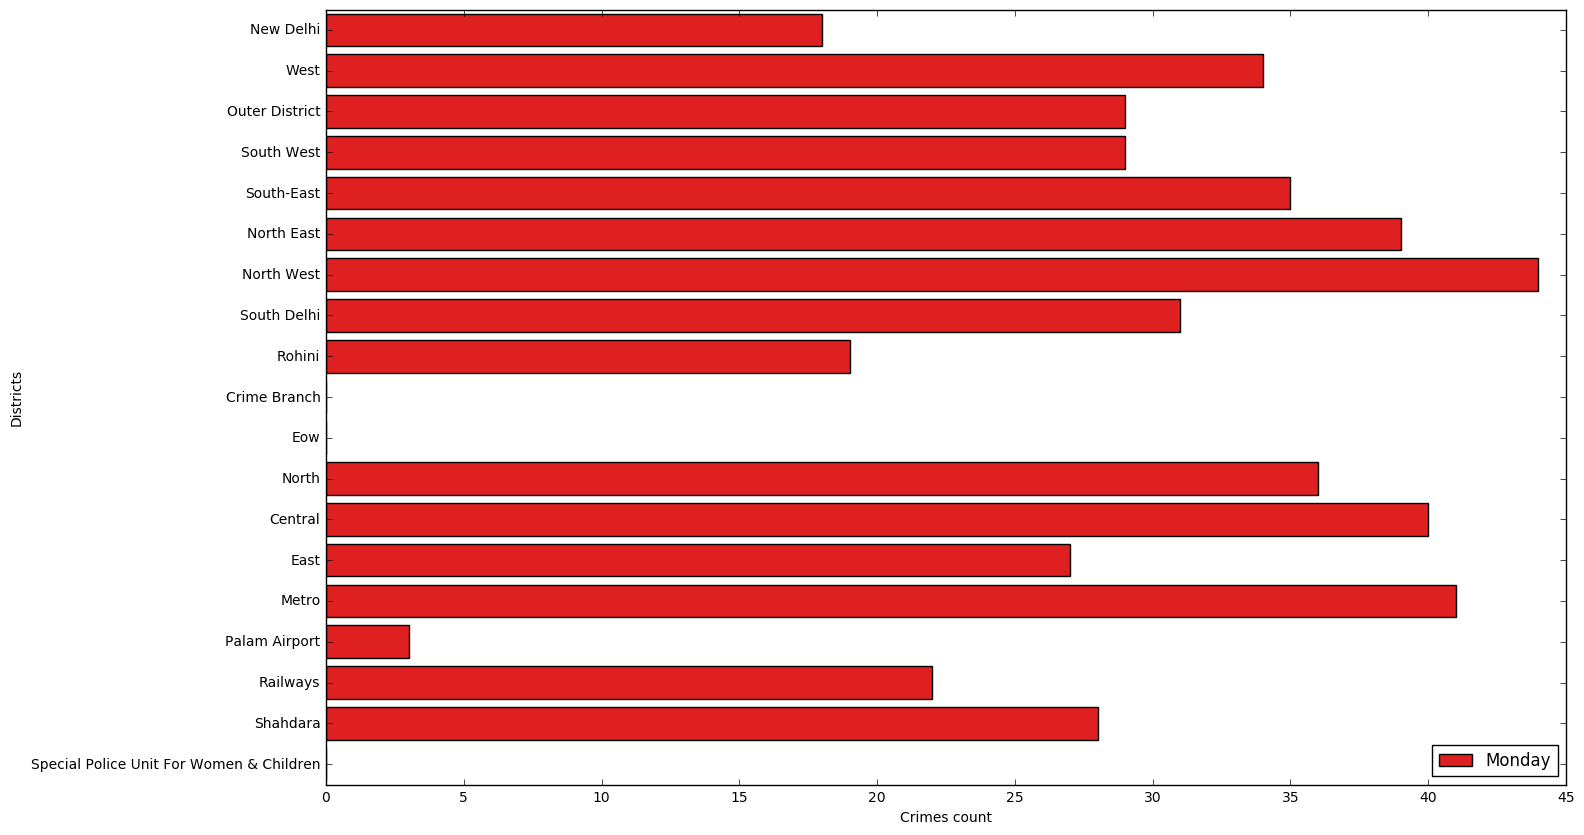

In [10]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Monday", data=data,label="Monday",color="r")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( xlabel="Crimes count", ylabel="Districts");

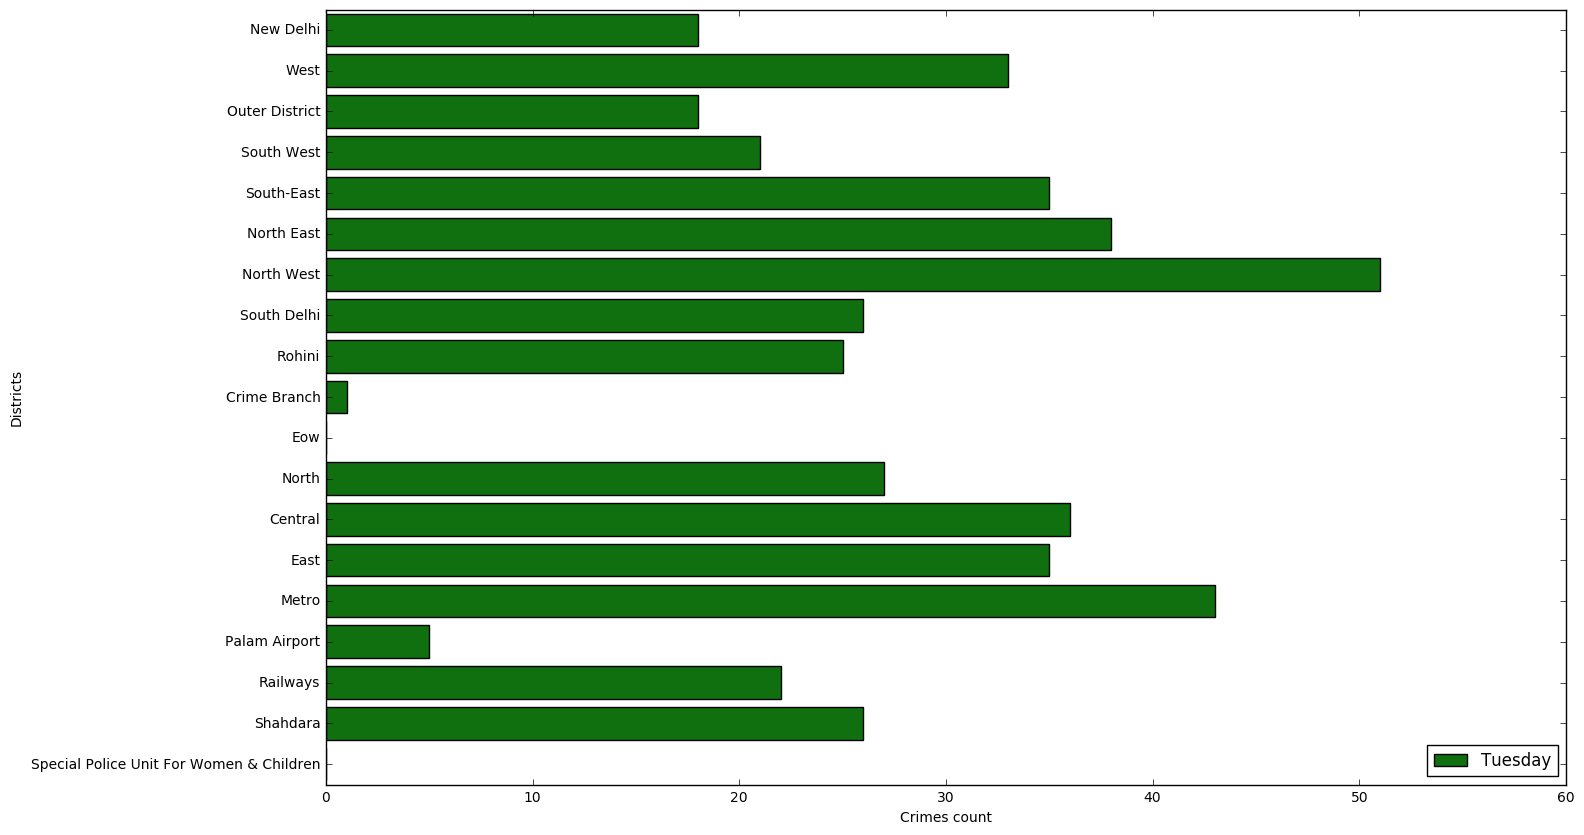

In [11]:
f, ax = plt.subplots(figsize=(16, 10))

# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Tuesday", data=data,label="Tuesday",color="g")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Crimes count", ylabel="Districts");

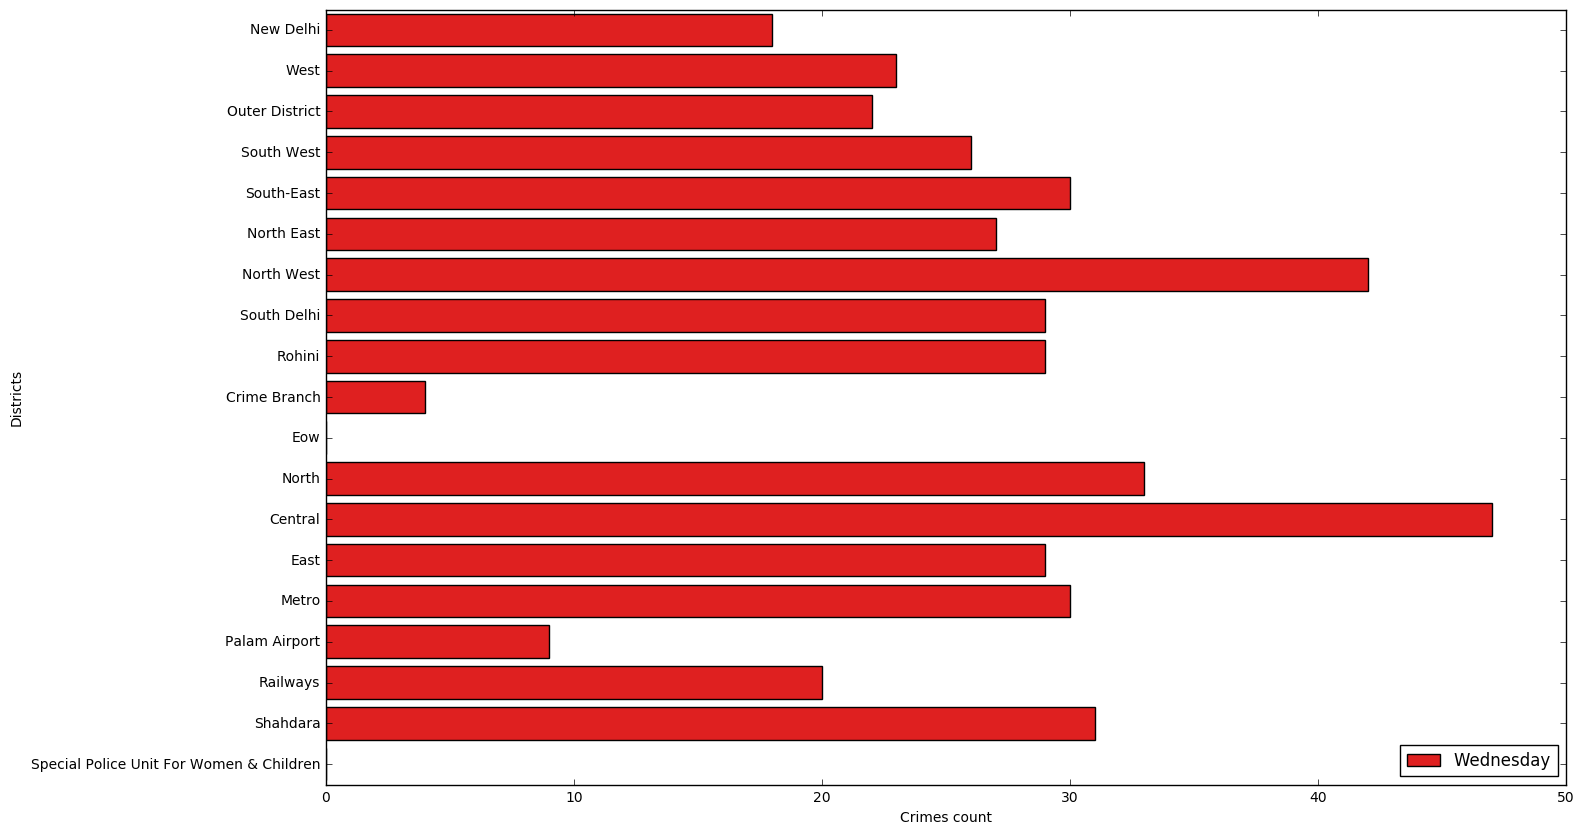

In [12]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Wednesday", data=data,label="Wednesday",color="r")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Crimes count", ylabel="Districts");

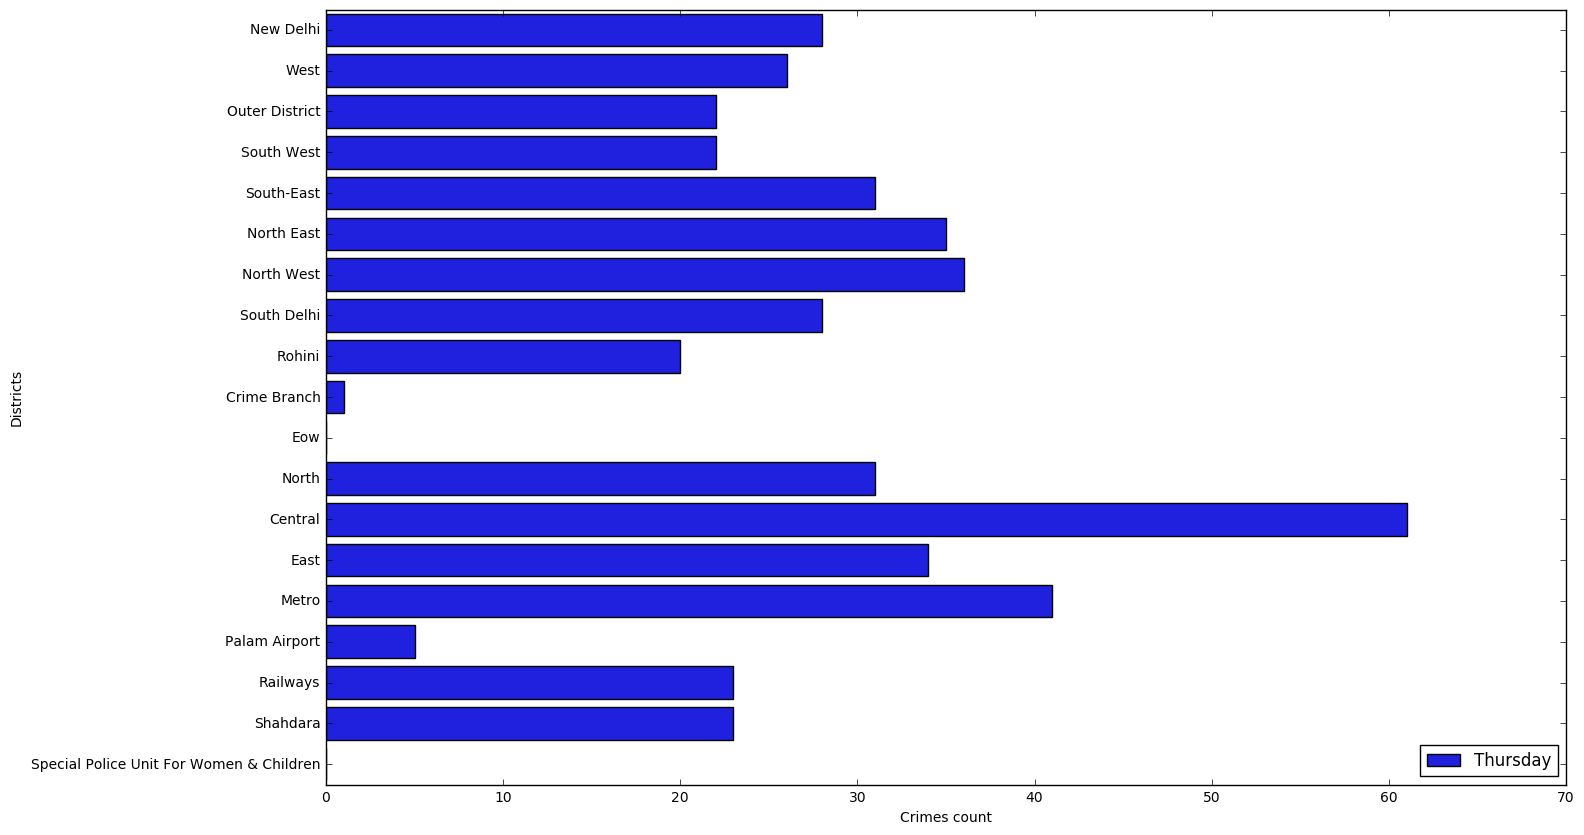

In [13]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Thursday", data=data,label="Thursday",color="b")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Crimes count", ylabel="Districts");

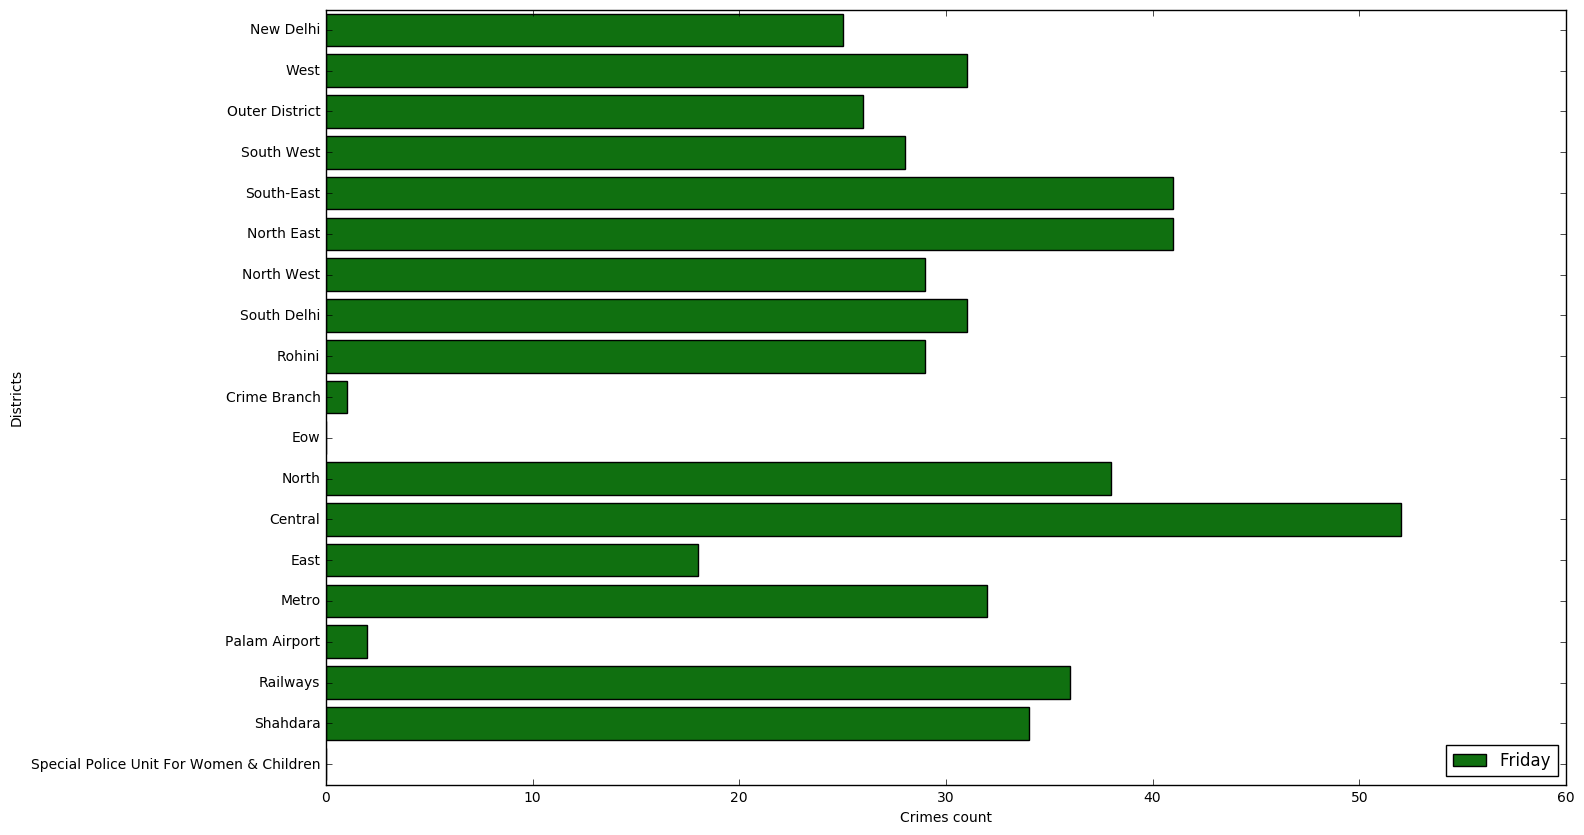

In [14]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Friday", data=data,label="Friday",color="g")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Crimes count", ylabel="Districts");

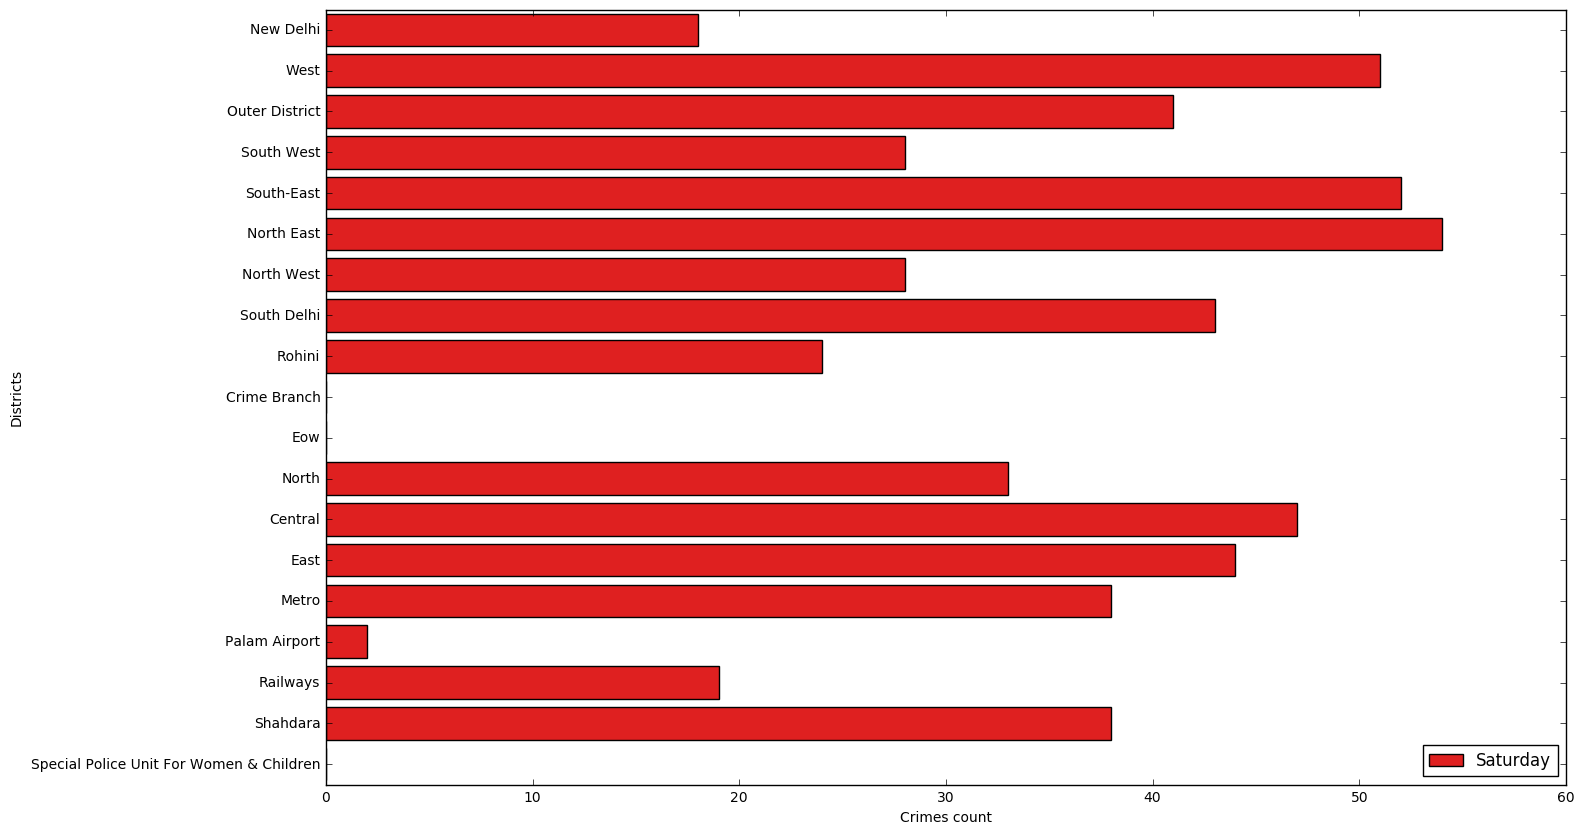

In [15]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="Saturday", data=data,label="Saturday",color="r")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Crimes count", ylabel="Districts");

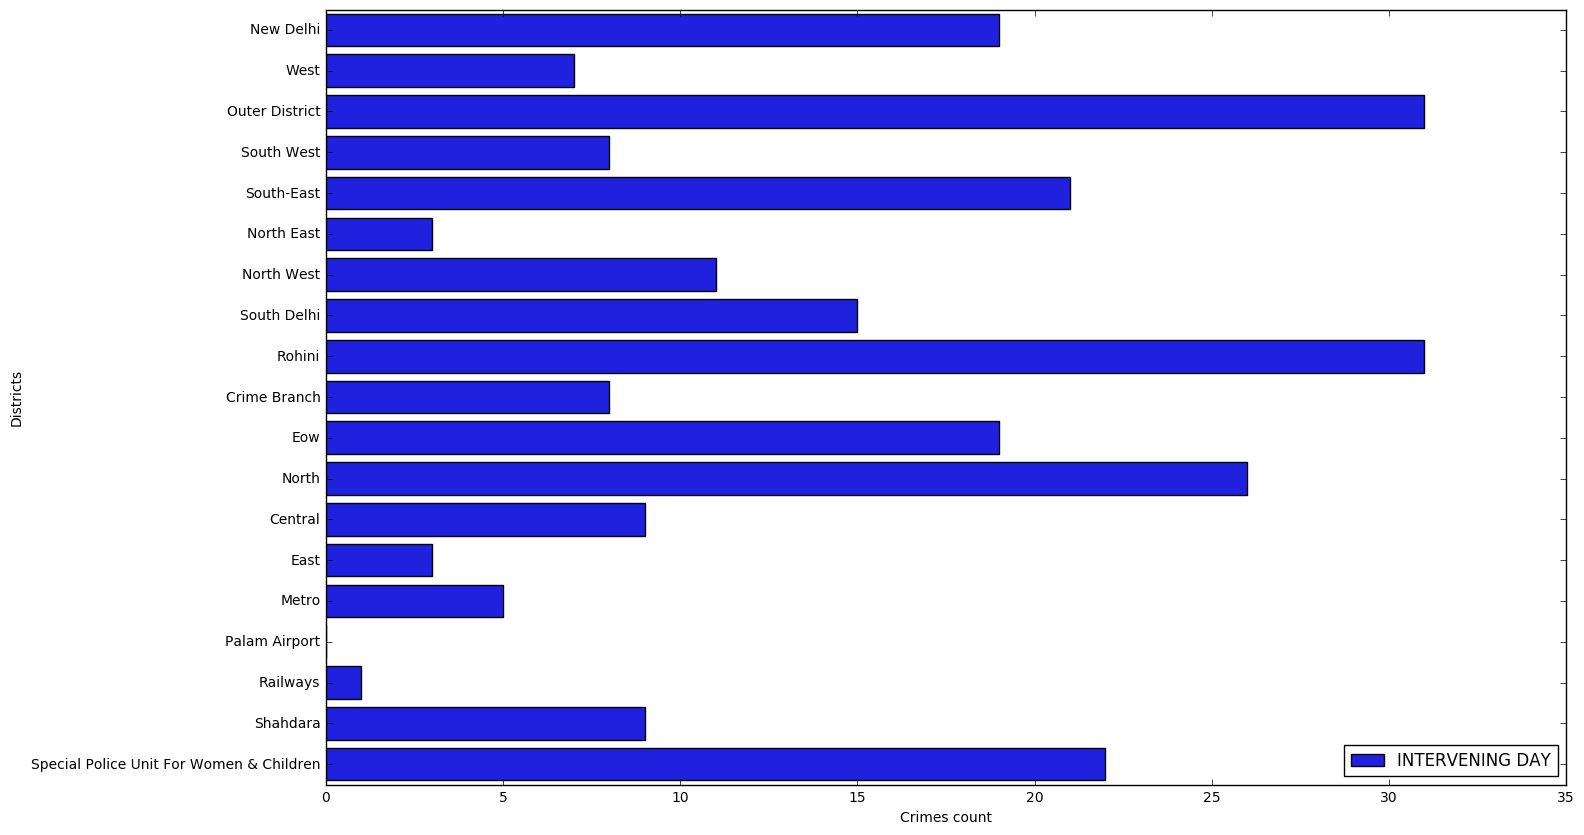

In [16]:
f, ax = plt.subplots(figsize=(16, 10))


# sns.set_color_codes("pastel")

sns.barplot(y="Districts", x="INTERVENING DAY", data=data,label="INTERVENING DAY",color="b")

# sns.set_xticklabels(10)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel="Crimes count", ylabel="Districts");

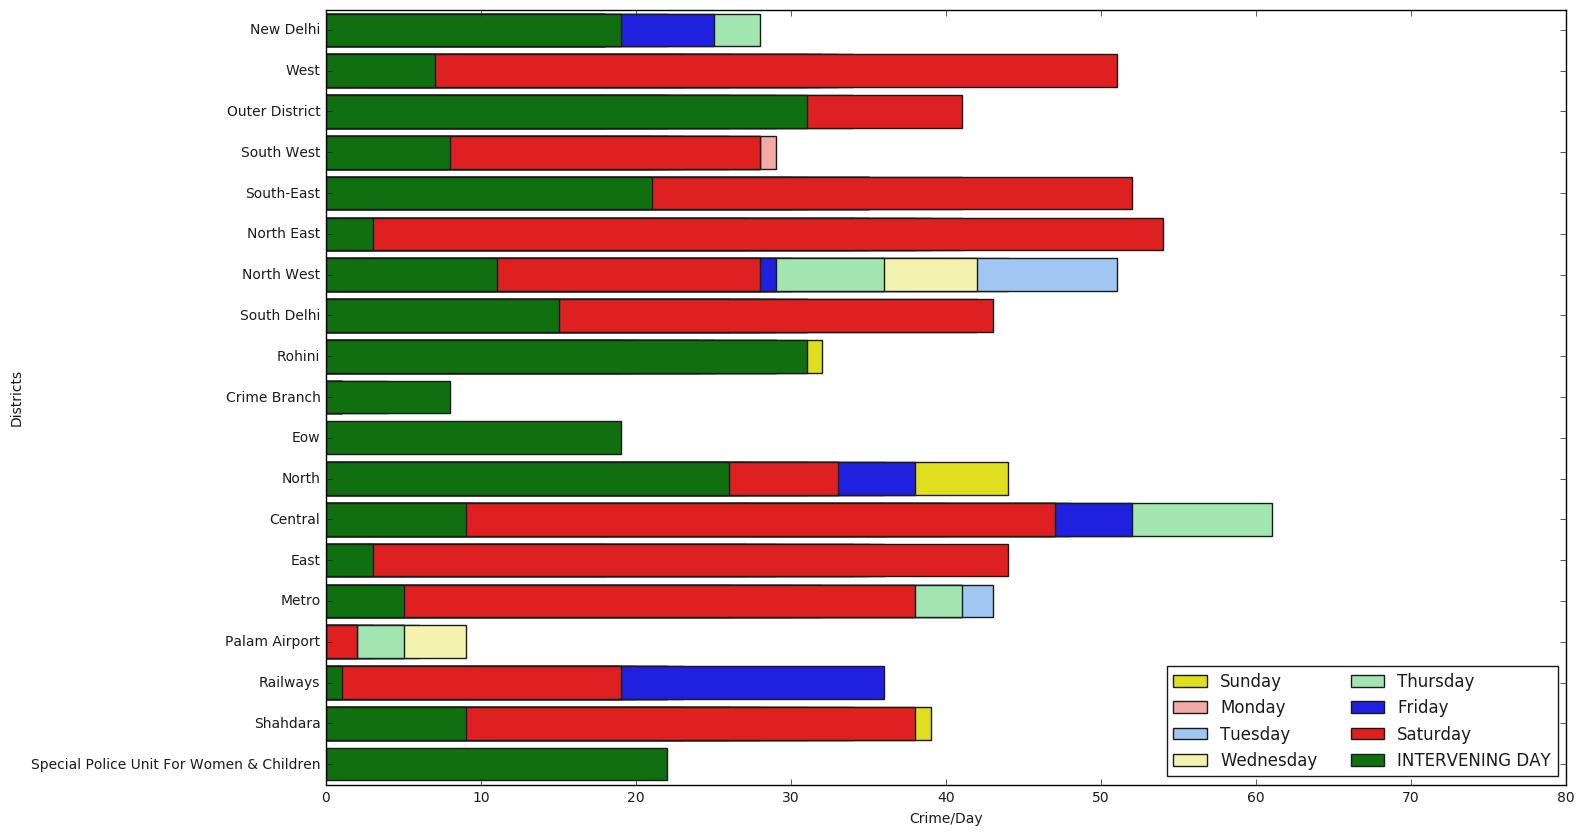

In [17]:
f, ax = plt.subplots(figsize=(16, 10))


sns.set_color_codes("pastel")

sns.barplot(x="Sunday", y="Districts", data=data,
            label="Sunday", color="Yellow")


sns.barplot(x="Monday", y="Districts", data=data,
             label="Monday", color="r")

sns.barplot(x="Tuesday", y="Districts", data=data,
            label="Tuesday", color="b")

sns.barplot(x="Wednesday", y="Districts", data=data,
            label="Wednesday", color="y")

sns.barplot(x="Thursday", y="Districts", data=data,
            label="Thursday", color="g")

sns.barplot(x="Friday", y="Districts", data=data,
            label="Friday", color="Blue")

sns.barplot(x="Saturday", y="Districts", data=data,
            label="Saturday", color="RED")

sns.barplot(x="INTERVENING DAY", y="Districts", data=data,
            label="INTERVENING DAY", color="GREEN")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 80), ylabel="Districts",
       xlabel="Crime/Day");

In [18]:
data


,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts,Total,Count
0,25.0,19.0,18.0,18.0,22.0,28.0,18.0,18.0,New Delhi,166.0,166.0
1,31.0,7.0,34.0,51.0,32.0,26.0,33.0,23.0,West,237.0,237.0
2,26.0,31.0,29.0,41.0,34.0,22.0,18.0,22.0,Outer District,223.0,223.0
3,28.0,8.0,29.0,28.0,23.0,22.0,21.0,26.0,South West,185.0,185.0
4,41.0,21.0,35.0,52.0,35.0,31.0,35.0,30.0,South-East,280.0,280.0
5,41.0,3.0,39.0,54.0,34.0,35.0,38.0,27.0,North East,271.0,271.0
6,29.0,11.0,44.0,28.0,30.0,36.0,51.0,42.0,North West,271.0,271.0
7,31.0,15.0,31.0,43.0,42.0,28.0,26.0,29.0,South Delhi,245.0,245.0
8,29.0,31.0,19.0,24.0,32.0,20.0,25.0,29.0,Rohini,209.0,209.0
9,1.0,8.0,0.0,0.0,1.0,1.0,1.0,4.0,Crime Branch,16.0,16.0


In [19]:
# X = data.iloc[:,:-2].values
# X


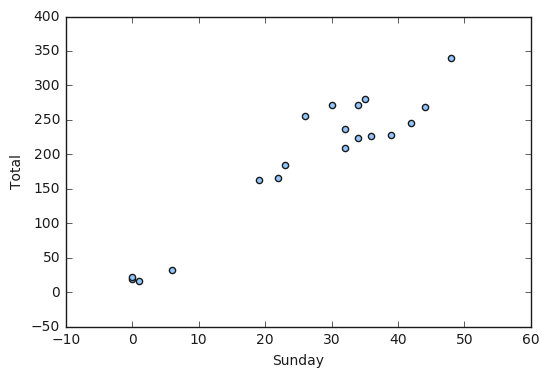

In [20]:
plt.scatter(data.Sunday,data['Total'])
plt.xlabel('Sunday')
plt.ylabel('Total')

In [21]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['Total']])
data['Total'] = scaler.transform(data[['Total']])

In [22]:
scaler.fit(data[['Sunday']])
data['Sunday'] = scaler.transform(data[['Sunday']])

scaler.fit(data[['Monday']])
data['Monday'] = scaler.transform(data[['Monday']])

scaler.fit(data[['Tuesday']])
data['Tuesday'] = scaler.transform(data[['Tuesday']])

scaler.fit(data[['Wednesday']])
data['Wednesday'] = scaler.transform(data[['Wednesday']])

scaler.fit(data[['Thursday']])
data['Thursday'] = scaler.transform(data[['Thursday']])

scaler.fit(data[['Friday']])
data['Friday'] = scaler.transform(data[['Friday']])

scaler.fit(data[['Saturday']])
data['Saturday'] = scaler.transform(data[['Saturday']])

scaler.fit(data[['INTERVENING DAY']])
data['INTERVENING DAY'] = scaler.transform(data[['INTERVENING DAY']])

data

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts,Total,Count
0,0.480769,0.612903,0.409091,0.333333,0.458333,0.459016,0.352941,0.382979,New Delhi,0.462963,166.0
1,0.596154,0.225806,0.772727,0.944444,0.666667,0.426230,0.647059,0.489362,West,0.682099,237.0
2,0.500000,1.000000,0.659091,0.759259,0.708333,0.360656,0.352941,0.468085,Outer District,0.638889,223.0
3,0.538462,0.258065,0.659091,0.518519,0.479167,0.360656,0.411765,0.553191,South West,0.521605,185.0
4,0.788462,0.677419,0.795455,0.962963,0.729167,0.508197,0.686275,0.638298,South-East,0.814815,280.0
5,0.788462,0.096774,0.886364,1.000000,0.708333,0.573770,0.745098,0.574468,North East,0.787037,271.0
6,0.557692,0.354839,1.000000,0.518519,0.625000,0.590164,1.000000,0.893617,North West,0.787037,271.0
7,0.596154,0.483871,0.704545,0.796296,0.875000,0.459016,0.509804,0.617021,South Delhi,0.706790,245.0
8,0.557692,1.000000,0.431818,0.444444,0.666667,0.327869,0.490196,0.617021,Rohini,0.595679,209.0
9,0.019231,0.258065,0.000000,0.000000,0.020833,0.016393,0.019608,0.085106,Crime Branch,0.000000,16.0


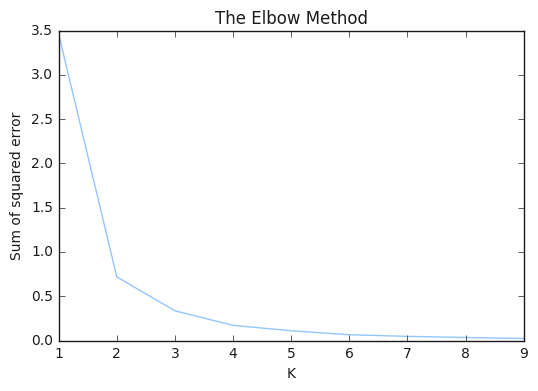

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Sunday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Sunday','Total']])
y_predicted

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1])

In [25]:
data['cluster_sunday']=y_predicted
data.head()

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts,Total,Count,cluster_sunday
0,0.480769,0.612903,0.409091,0.333333,0.458333,0.459016,0.352941,0.382979,New Delhi,0.462963,166.0,2
1,0.596154,0.225806,0.772727,0.944444,0.666667,0.426230,0.647059,0.489362,West,0.682099,237.0,0
2,0.500000,1.000000,0.659091,0.759259,0.708333,0.360656,0.352941,0.468085,Outer District,0.638889,223.0,0
3,0.538462,0.258065,0.659091,0.518519,0.479167,0.360656,0.411765,0.553191,South West,0.521605,185.0,2
4,0.788462,0.677419,0.795455,0.962963,0.729167,0.508197,0.686275,0.638298,South-East,0.814815,280.0,0


In [26]:
km.cluster_centers_

array([[ 0.75      ,  0.73611111],
       [ 0.03645833,  0.01929012],
       [ 0.44444444,  0.47839506]])

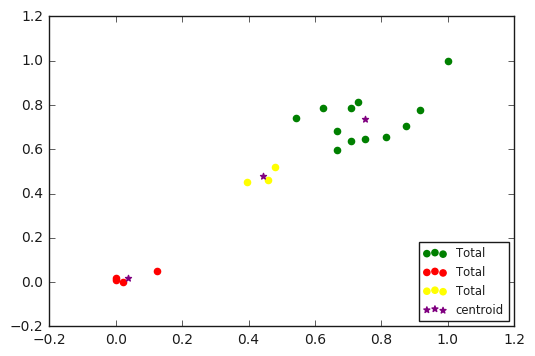

In [27]:
from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_sunday==0]
df2 = data[data.cluster_sunday==1]
df3 = data[data.cluster_sunday==2]
# df4 = data[data.cluster_sunday==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Sunday,df1['Total'],color='green')
plt.scatter(df2.Sunday,df2['Total'],color='red')
plt.scatter(df3.Sunday,df3['Total'],color='yellow')
# plt.scatter(df4.Sunday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [28]:
lt = {}
lt['Sunday'] = df2.Districts

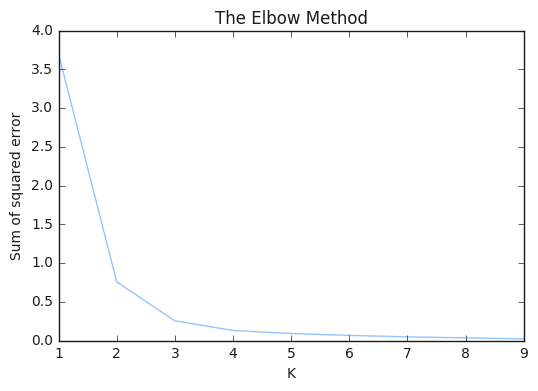

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Monday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [30]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Monday','Total']])
y_predicted

array([2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1])

In [31]:
data['cluster_monday']=y_predicted
data.head()

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts,Total,Count,cluster_sunday,cluster_monday
0,0.480769,0.612903,0.409091,0.333333,0.458333,0.459016,0.352941,0.382979,New Delhi,0.462963,166.0,2,2
1,0.596154,0.225806,0.772727,0.944444,0.666667,0.426230,0.647059,0.489362,West,0.682099,237.0,0,0
2,0.500000,1.000000,0.659091,0.759259,0.708333,0.360656,0.352941,0.468085,Outer District,0.638889,223.0,0,2
3,0.538462,0.258065,0.659091,0.518519,0.479167,0.360656,0.411765,0.553191,South West,0.521605,185.0,2,2
4,0.788462,0.677419,0.795455,0.962963,0.729167,0.508197,0.686275,0.638298,South-East,0.814815,280.0,0,0


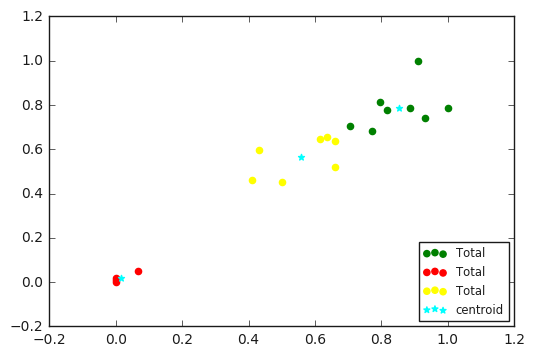

In [32]:
from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_monday==0]
df2 = data[data.cluster_monday==1]
df3 = data[data.cluster_monday==2]
# df4 = data[data.cluster_monday==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Monday,df1['Total'],color='green')
plt.scatter(df2.Monday,df2['Total'],color='red')
plt.scatter(df3.Monday,df3['Total'],color='yellow')
# plt.scatter(df4.Monday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [33]:
lt["Monday"] = df1.Districts

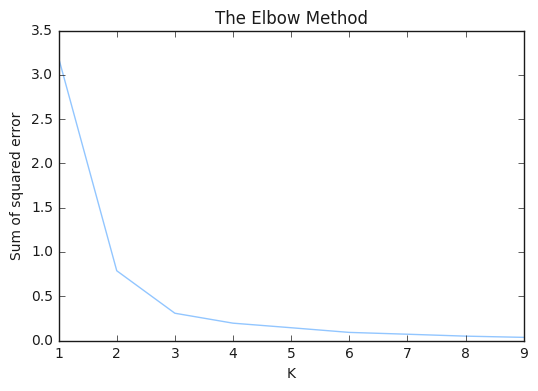

In [34]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Tuesday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

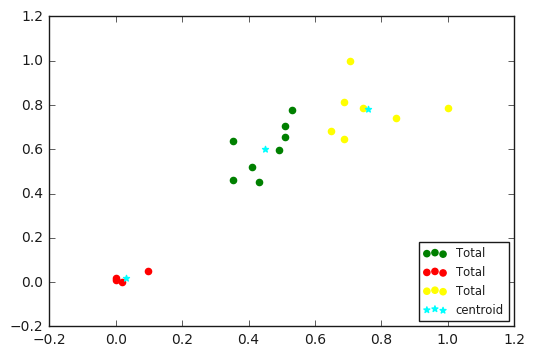

In [35]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Tuesday','Total']])
data['cluster_tuesday']=y_predicted

from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_tuesday==0]
df2 = data[data.cluster_tuesday==1]
df3 = data[data.cluster_tuesday==2]
# df4 = data[data.cluster==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Tuesday,df1['Total'],color='green')
plt.scatter(df2.Tuesday,df2['Total'],color='red')
plt.scatter(df3.Tuesday,df3['Total'],color='yellow')
# plt.scatter(df4.Sunday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [36]:
lt["Tuesday"] = df1.Districts

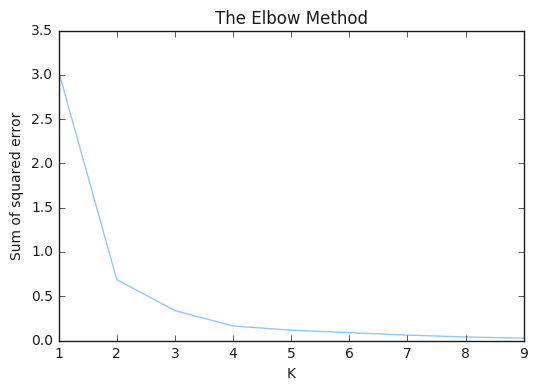

In [37]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Wednesday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

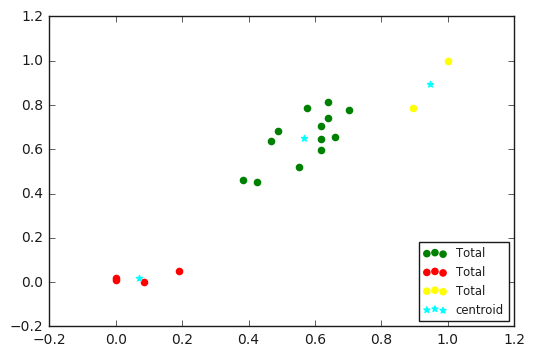

In [38]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Wednesday','Total']])
data['cluster_wednesday']=y_predicted

from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_wednesday==0]
df2 = data[data.cluster_wednesday==1]
df3 = data[data.cluster_wednesday==2]
# df4 = data[data.cluster==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Wednesday,df1['Total'],color='green')
plt.scatter(df2.Wednesday,df2['Total'],color='red')
plt.scatter(df3.Wednesday,df3['Total'],color='yellow')
# plt.scatter(df4.Sunday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [39]:
lt["Wednesday"] = df2.Districts

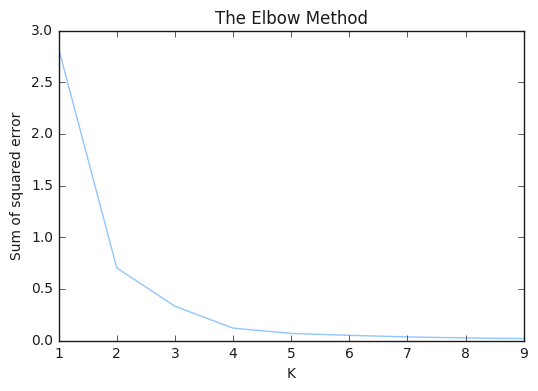

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Thursday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

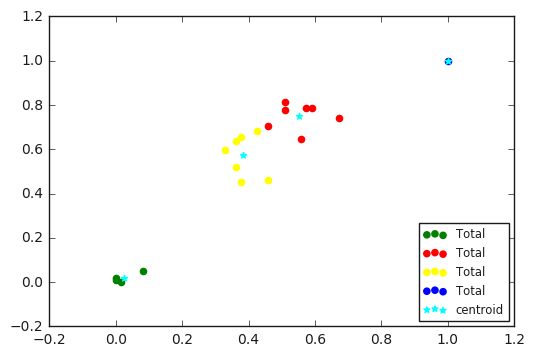

In [41]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(data[['Thursday','Total']])
data['cluster_thursday']=y_predicted

from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_thursday==0]
df2 = data[data.cluster_thursday==1]
df3 = data[data.cluster_thursday==2]
df4 = data[data.cluster_thursday==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Thursday,df1['Total'],color='green')
plt.scatter(df2.Thursday,df2['Total'],color='red')
plt.scatter(df3.Thursday,df3['Total'],color='yellow')
plt.scatter(df4.Thursday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [42]:
lt["Thursday"] = df1.Districts + df3.Districts

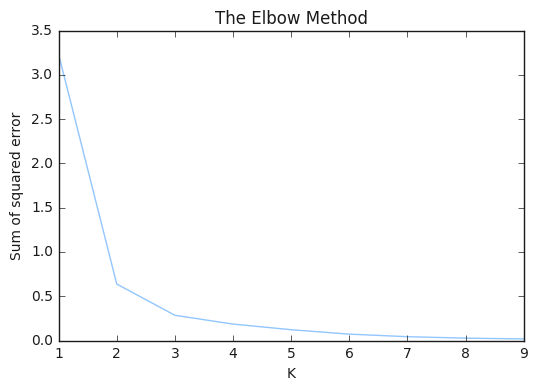

In [43]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Friday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

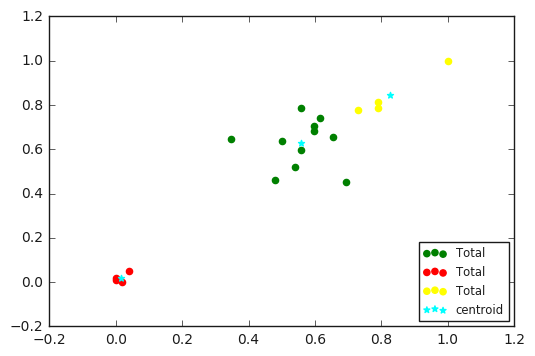

In [44]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Friday','Total']])
data['cluster_friday']=y_predicted

from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_friday==0]
df2 = data[data.cluster_friday==1]
df3 = data[data.cluster_friday==2]
# df4 = data[data.cluster_friday==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Friday,df1['Total'],color='green')
plt.scatter(df2.Friday,df2['Total'],color='red')
plt.scatter(df3.Friday,df3['Total'],color='yellow')
# plt.scatter(df4.Thursday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [45]:
lt["Friday"] = df2.Districts

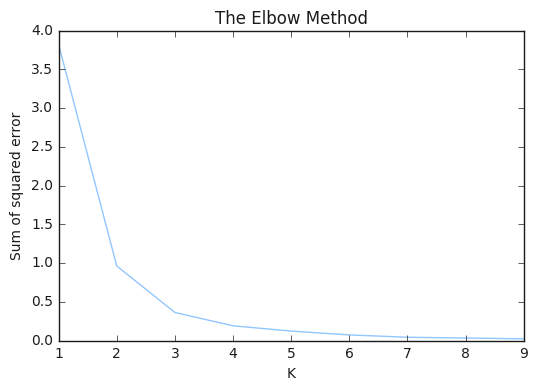

In [46]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Saturday','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

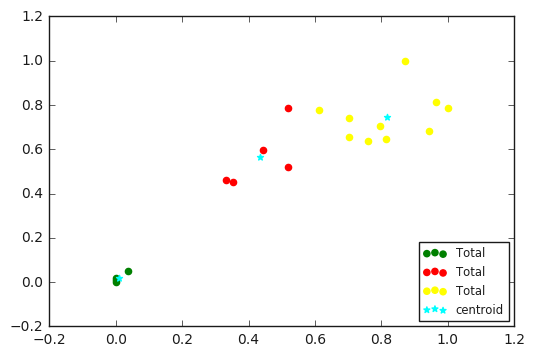

In [47]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Saturday','Total']])
data['cluster_saturday']=y_predicted

from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_saturday==0]
df2 = data[data.cluster_saturday==1]
df3 = data[data.cluster_saturday==2]
# df4 = data[data.cluster_friday==3]
# df5 = data[data.cluster==4]
plt.scatter(df1.Saturday,df1['Total'],color='green')
plt.scatter(df2.Saturday,df2['Total'],color='red')
plt.scatter(df3.Saturday,df3['Total'],color='yellow')
# plt.scatter(df4.Thursday,df4['Total'],color='blue')
# plt.scatter(df5.Sunday,df5['Total'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [48]:
lt["Saturday"] = df1.Districts

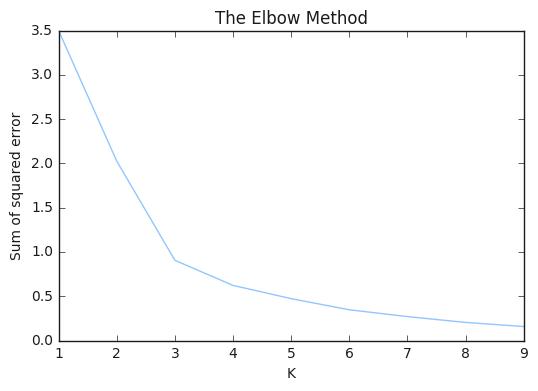

In [49]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['INTERVENING DAY','Total']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.title('The Elbow Method')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

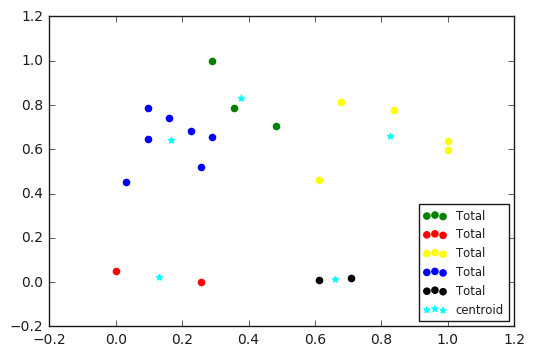

In [50]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(data[['INTERVENING DAY','Total']])
data['cluster_inter']=y_predicted

from matplotlib.font_manager import FontProperties
fontp = FontProperties()
fontp.set_size('small')

df1 = data[data.cluster_inter==0]
df2 = data[data.cluster_inter==1]
df3 = data[data.cluster_inter==2]
df4 = data[data.cluster_inter==3]
df5 = data[data.cluster_inter==4]
# df6 = data[data.cluster_inter==5]
plt.scatter(df1['INTERVENING DAY'],df1['Total'],color='green')
plt.scatter(df2['INTERVENING DAY'],df2['Total'],color='red')
plt.scatter(df3['INTERVENING DAY'],df3['Total'],color='yellow')
plt.scatter(df4['INTERVENING DAY'],df4['Total'],color='blue')
plt.scatter(df5['INTERVENING DAY'],df5['Total'],color='black')
# plt.scatter(df6['INTERVENING DAY'],df6['Total'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='cyan',marker='*',label='centroid')
plt.legend(loc = "lower right",prop = fontp)

In [51]:
lt["INTERVENING DAY"] = df2.Districts

In [52]:
data

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts,Total,Count,cluster_sunday,cluster_monday,cluster_tuesday,cluster_wednesday,cluster_thursday,cluster_friday,cluster_saturday,cluster_inter
0,0.480769,0.612903,0.409091,0.333333,0.458333,0.459016,0.352941,0.382979,New Delhi,0.462963,166.0,2,2,0,0,2,0,1,2
1,0.596154,0.225806,0.772727,0.944444,0.666667,0.426230,0.647059,0.489362,West,0.682099,237.0,0,0,2,0,2,0,2,3
2,0.500000,1.000000,0.659091,0.759259,0.708333,0.360656,0.352941,0.468085,Outer District,0.638889,223.0,0,2,0,0,2,0,2,2
3,0.538462,0.258065,0.659091,0.518519,0.479167,0.360656,0.411765,0.553191,South West,0.521605,185.0,2,2,0,0,2,0,1,3
4,0.788462,0.677419,0.795455,0.962963,0.729167,0.508197,0.686275,0.638298,South-East,0.814815,280.0,0,0,2,0,1,2,2,2
5,0.788462,0.096774,0.886364,1.000000,0.708333,0.573770,0.745098,0.574468,North East,0.787037,271.0,0,0,2,0,1,2,2,3
6,0.557692,0.354839,1.000000,0.518519,0.625000,0.590164,1.000000,0.893617,North West,0.787037,271.0,0,0,2,2,1,0,1,0
7,0.596154,0.483871,0.704545,0.796296,0.875000,0.459016,0.509804,0.617021,South Delhi,0.706790,245.0,0,0,0,0,1,0,2,0
8,0.557692,1.000000,0.431818,0.444444,0.666667,0.327869,0.490196,0.617021,Rohini,0.595679,209.0,0,2,0,0,2,0,1,2
9,0.019231,0.258065,0.000000,0.000000,0.020833,0.016393,0.019608,0.085106,Crime Branch,0.000000,16.0,1,1,1,1,0,1,0,1


In [53]:
data.to_csv('After cluster data.csv',index=False)

In [54]:
#generate map
table = data.iloc[:,[8,10]]
# # d = ['Shahdara', 'East', 'South East', 'South', 'New Delhi', 'South West', 'West', 'North West', 'North', 'Central']
# d = ["Metro"]
# t = []
# for i in range(len(table['Districts'])):
#     if table['Districts'][i] not in d:
#         t.append(i)
# table = table.drop(table.index[t])
# table = table.reset_index(drop=True)
# # table = table.iloc[[1],:]
table

,Districts,Count
0,New Delhi,166.0
1,West,237.0
2,Outer District,223.0
3,South West,185.0
4,South-East,280.0
5,North East,271.0
6,North West,271.0
7,South Delhi,245.0
8,Rohini,209.0
9,Crime Branch,16.0


In [55]:
import folium
gjson = 'Delhi.geojson'
sf_map = folium.Map(location = [28.6139, 77.2090],zoom_start = 9.5) # tiles="Mapbox Bright", tiles='openstreetmap'
folium.Marker(location=[28.6139, 77.2090], tooltip = 'New Delhi').add_to(sf_map)
# folium.Marker(location=[28.7041, 77.1025], tooltip = 'Delhi').add_to(sf_map)
# folium.Marker(location=[28.6663, 77.0680], tooltip='West').add_to(sf_map)
# folium.Marker(location=[28.6888, 77.1091], tooltip='Outer District').add_to(sf_map)
# folium.Marker(location=[28.5929, 77.0346], tooltip='South West').add_to(sf_map)
# folium.Marker(location=[28.7184, 77.2580], tooltip='North East').add_to(sf_map)

# folium.Marker(location=[28.5630, 77.2611], tooltip='South East', icon = 'leaf').add_to(sf_map)
# # folium.Marker(location=[28.5929, 77.0346], tooltip='South West').add_to(sf_map)
# # folium.Marker(location==[28.7184, 77.2580], tooltip='North East').add_to(sf_map)
                                                                         
# folium.TileLayer('cartodbdark_matter').add_to(sf_map)
# folium.LayerControl().add_to(sf_map)
sf_map

In [56]:
#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Districts', 'Count'],
    key_on = 'feature.properties.Dist_Name', #key_on='feature.properties.DISTRICT',
    #fill_color = 'YlOrRd',
    fill_color = 'Set3',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate % in Delhi'
)
# folium.LayerControl().add_to(sf_map)
# Save to html
sf_map.save('Result.html')


C:\Users\ASUS\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [57]:
sf_map

In [91]:
lt = pd.DataFrame(lt)
lt_cols = list(lt.keys())

In [92]:
lt.fillna('Safe', inplace = True)
lt

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,New Delhi,New Delhi,Safe,New Delhi,Safe,Safe,New Delhi,Safe
1,West,Safe,West,Safe,West,Safe,Safe,Safe
2,Outer District,Outer District,Safe,Safe,Outer District,Safe,Outer District,Safe
3,South West,Safe,Safe,South West,Safe,Safe,South West,Safe
4,Safe,South-East,South-East,Safe,South-East,Safe,Safe,Safe
5,Safe,Safe,North East,Safe,North East,Safe,Safe,Safe
6,North West,Safe,North West,North West,North West,Safe,Safe,Safe
7,South Delhi,Safe,South Delhi,Safe,South Delhi,Safe,South Delhi,Safe
8,Rohini,Rohini,Safe,Rohini,Rohini,Safe,Rohini,Safe
9,Safe,Safe,Safe,Safe,Safe,Safe,Safe,Crime Branch


In [93]:
lt_cols


['Friday',
 'INTERVENING DAY',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday']

In [94]:
dis = [data['Districts']]
for i in lt_cols:
    for j in dis:
        lt[i].replace(to_replace = j, value = "Unsafe", inplace=True)
lt['Districts'] = data.Districts
lt

,Friday,INTERVENING DAY,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Districts
0,Unsafe,Unsafe,Safe,Unsafe,Safe,Safe,Unsafe,Safe,New Delhi
1,Unsafe,Safe,Unsafe,Safe,Unsafe,Safe,Safe,Safe,West
2,Unsafe,Unsafe,Safe,Safe,Unsafe,Safe,Unsafe,Safe,Outer District
3,Unsafe,Safe,Safe,Unsafe,Safe,Safe,Unsafe,Safe,South West
4,Safe,Unsafe,Unsafe,Safe,Unsafe,Safe,Safe,Safe,South-East
5,Safe,Safe,Unsafe,Safe,Unsafe,Safe,Safe,Safe,North East
6,Unsafe,Safe,Unsafe,Unsafe,Unsafe,Safe,Safe,Safe,North West
7,Unsafe,Safe,Unsafe,Safe,Unsafe,Safe,Unsafe,Safe,South Delhi
8,Unsafe,Unsafe,Safe,Unsafe,Unsafe,Safe,Unsafe,Safe,Rohini
9,Safe,Safe,Safe,Safe,Safe,Safe,Safe,Unsafe,Crime Branch


In [95]:
folium.__version__

'0.10.0'